Challenge: Predicting diabetes in patients
Throughout this module, you dove deep into the topics of exploratory data analysis (EDA) and its substeps. Now, it's time to apply your knowledge.

In this challenge, you'll work with the Pima Indians Diabetes dataset from Kaggle. This data was originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases. This dataset contains a subset of patient data from a larger database; in particular, it only contains female patients of Pima Indian heritage over the age of 21.

You will view this dataset through the lens of the following predictive problem: Can you predict the likelihood that a patient has diabetes using various medical diagnostic measurements?

In this context:

- Target/Response: Outcome, which is 0-1 binary
- Predictors: All other columns in the dataset (e.g., Pregnancies, Glucose, etc.), which are all numeric

You should access the data from the Thinkful database. Here are the credentials that you can use to connect to the database:

```
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'diabetes'
table_name = 'diabetes'
```

To complete this challenge, you'll answer a series of questions about the dataset, and then submit a Jupyter Notebook containing your solutions to the following tasks. In addition, you can also submit a kernel to the Kaggle community containing your solutions if you wish.

Your goals in this challenge include validating the data, identifying potential data integrity issues, and identifying basic relationships between the target and provided predictors through EDA.

1. First, load the dataset and do some basic EDA.

2. Detect the problems with the data, such as missing values and outliers. Are there any nonsense values that you need to handle? For the missing values, think about which techniques would be the most suitable for handling these values. Regarding the outliers, think about their potential effects on your analysis and select an appropriate method to deal with them.

3. Explore the data using univariate and multivariate exploration techniques. Be sure to pay special attention to your target variable. In this regard, focus on finding the relevant variables that may affect the likelihood of having diabetes.

4. In the feature-engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are highly correlated with the other ones or the variables that you think are irrelevant for predicting whether a patient has diabetes.

5. Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

##About the Data

- `https://www.kaggle.com/uciml/pima-indians-diabetes-database`

- Context
  - This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically **predict whether or not a patient has diabetes**, based on certain diagnostic measurements included in the dataset
  - Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are **females at least 21 years old of Pima Indian heritage**

- The datasets consists of several medical predictor variables and **one target variable, Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- Limitations: Diabetes vs Gestational Diabetes 
  - Would like an indicator if woman is currently pregnant
  - Gestational Diabetes requires different 1 hour test 

> or the Gestational Diabetes test please refer to the Glucose Tolerance-Gestational Diabetes 1 hour test. 

In [ ]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'diabetes'
table_name = 'diabetes'

In [ ]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from diabetes',con=engine)

engine.dispose()

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        763 non-null    int64  
 1   glucose            763 non-null    int64  
 2   blood_pressure     763 non-null    int64  
 3   skin_thickness     763 non-null    int64  
 4   insulin            763 non-null    int64  
 5   bmi                763 non-null    float64
 6   diabetes_pedigree  763 non-null    float64
 7   age                763 non-null    int64  
 8   outcome            763 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.8 KB


- no nulls
- data type either int or float

The pandas library includes a function called isnull(). This function returns True if an element has no value; otherwise, it returns None or False for each element in a DataFrame.

In [ ]:
df.isnull().sum()

pregnancies          0
glucose              0
blood_pressure       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
age                  0
outcome              0
dtype: int64

No entries categorized as `null`

In [ ]:
round(df.describe(),2)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
count,763.00,763.00,763.00,763.00,763.00,763.00,763.00,763.00,763.00
mean,3.85,121.69,69.12,20.48,80.29,31.99,0.47,33.27,0.35
std,3.37,30.54,19.40,15.97,115.46,7.89,0.33,11.77,0.48
min,0.00,44.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,36.00,32.00,0.37,29.00,0.00
75%,6.00,141.00,80.00,32.00,128.50,36.55,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


- Min `'blood_pressure' == 0 ` &#8594; missing values
- Min `'skin_thickness' == 0 ` &#8594; missing values
- Min `'insulin' == 0 ` &#8594; missing values
- Min `'bmi' == 0 ` &#8594; missing values
- Max `'bmi' == 67.10` &#8594; Potential Outlier 
- `diabetes_pedigree`: Diabetes pedigree function
- Max `'diabetes_pedigree' == 2.42` &#8594; Potential Outlier 
- `'pregnancies'`: Number of times pregnant
- Max `'pregnancies' == 17` &#8594; Potential Outlier

```
# deep dive into groupby

grp = df.groupby('Name')
for name, group in grp:
    print(name)
    print(group)
    print()
```

```
# an alternitive to .describe()

# applying a function by passing
# a list of functions
  
grp = df.groupby('Name')
  
grp['Age'].agg([np.sum, np.mean, np.std])
```

ABC's of stripping a string

```
a_string = '"ab"cd"'

stripped_string = a_string.strip('"')
Remove " from both ends of a_string


print(stripped_string)
```

```
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()
```

```
for name, group in grp:
    print(name) # 0 or 1 in this case
    print(group) # prints out index for each group
    print()
```

In [ ]:
# deep dive into groupby
# everything but outcome column
columns = df.columns[:-1]
grp = df.groupby('outcome')

In [ ]:
print(columns)

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree', 'age'],
      dtype='object')


In [ ]:
len(columns)

8

In [ ]:
for col in columns:
  print(col)
  print(grp[col].agg([np.mean, np.std]))

pregnancies
             mean       std
outcome                    
0        3.311871  3.020982
1        4.860902  3.754672
glucose
               mean        std
outcome                       
0        110.643863  24.776906
1        142.319549  29.599199
blood_pressure
              mean        std
outcome                      
0        68.213280  18.093028
1        70.800752  21.564685
skin_thickness
              mean        std
outcome                      
0        19.631791  14.918976
1        22.056391  17.697900
insulin
               mean         std
outcome                        
0         69.160966   99.045537
1        101.090226  138.936280
bmi
              mean       std
outcome                     
0        30.317304  7.707696
1        35.106015  7.277489
diabetes_pedigree
             mean       std
outcome                    
0        0.430662  0.299642
1        0.550605  0.373388
age
              mean        std
outcome                      
0        31.247485  11.6

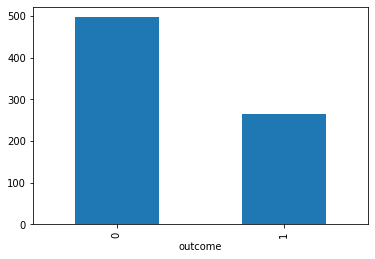

In [ ]:
grp.size().plot(kind = "bar")
plt.show()

## Explore Visualization

Bivariate: Continuous - Categorical
- Group by
- box plots, bar plots, or other plots
- Formal test: either t test or ANOVA F-test

Bivariate: Categorical - Categorical
- crosstab
- count plot
- formal test: Chi-square 
  - beware of small sample sizes

Types of Visualization, Categorical:

- Categorical scatterplots:

    - stripplot() (with kind="strip"; the default)

    - swarmplot() (with kind="swarm")

- Categorical distribution plots:

    - boxplot() (with kind="box")

    - violinplot() (with kind="violin")

    - boxenplot() (with kind="boxen")

- Categorical estimate plots:

    - pointplot() (with kind="point")

    - barplot() (with kind="bar")

    - countplot() (with kind="count")

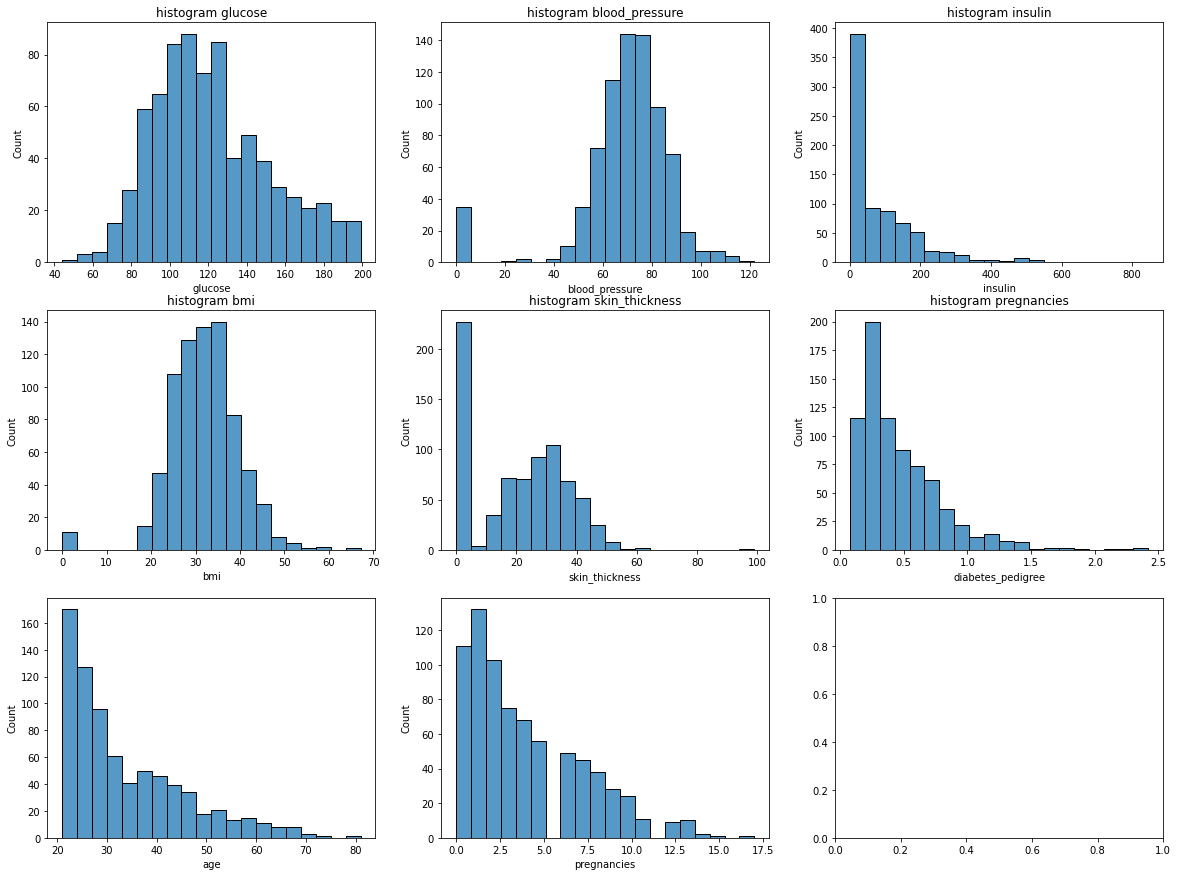

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))

sns.histplot(df['glucose'], bins=20, ax=ax[0,0])
ax[0,0].set_title('histogram glucose')

sns.histplot(df['blood_pressure'], bins=20, ax=ax[0,1])
ax[0,1].set_title('histogram blood_pressure')

sns.histplot(df['insulin'], bins=20, ax=ax[0,2])
ax[0,2].set_title('histogram insulin')

sns.histplot(df['bmi'], bins=20, ax=ax[1,0])
ax[1,0].set_title('histogram bmi')

sns.histplot(df['skin_thickness'], bins=20, ax=ax[1,1])
ax[1,1].set_title('histogram skin_thickness')

sns.histplot(df['diabetes_pedigree'], bins=20, ax=ax[1,2])
ax[1,2].set_title('histogram diabetes_pedigree')

sns.histplot(df['age'], bins=20, ax=ax[2,0])
ax[1,2].set_title('histogram age')

sns.histplot(df['pregnancies'], bins=20, ax=ax[2,1])
ax[1,2].set_title('histogram pregnancies')

plt.show()

- very small sample size outliers `'pregnancies' = [14, 15, 17]`
- outlier `'skin_thickness'` around 100
- outlier/skew `'diabetes_pedigree'` above 2.0

- should remove `'blood_pressure' == 0 `
- should remove `'bmi' == 0 `
- should remove `'skin_thickness' == 0 `
- **be mindful of how many observations removing**

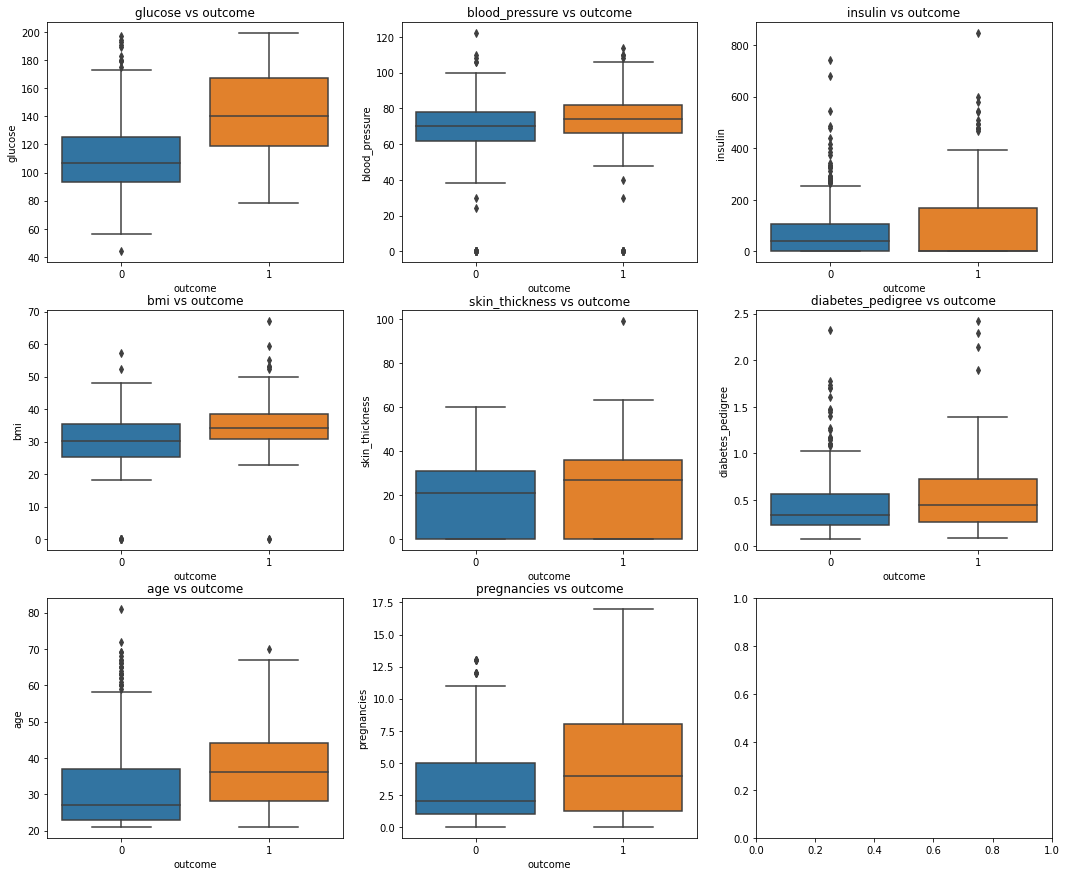

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(18,15))

sns.boxplot(x='outcome', y='glucose', data=df, ax=ax[0,0])
ax[0,0].set_title('glucose vs outcome')

sns.boxplot(x='outcome', y='blood_pressure', data=df, ax=ax[0,1])
ax[0,1].set_title('blood_pressure vs outcome')

sns.boxplot(x='outcome', y='insulin', data=df, ax=ax[0,2])
ax[0,2].set_title('insulin vs outcome')

sns.boxplot(x='outcome', y='bmi', data=df, ax=ax[1,0])
ax[1,0].set_title('bmi vs outcome')

sns.boxplot(x='outcome', y='skin_thickness', data=df, ax=ax[1,1])
ax[1,1].set_title('skin_thickness vs outcome')

sns.boxplot(x='outcome', y='diabetes_pedigree', data=df, ax=ax[1,2])
ax[1,2].set_title('diabetes_pedigree vs outcome')

sns.boxplot(x='outcome', y='age', data=df, ax=ax[2,0])
ax[2,0].set_title('age vs outcome')

sns.boxplot(x='outcome', y='pregnancies', data=df, ax=ax[2,1])
ax[2,1].set_title('pregnancies vs outcome')

plt.show()

Box-Plot Conclusion:
- glucose seems different in two groups
- higher mean in pregnancies in diabetic group, but higher variance 
- blood pressure very similar distributions
- and skin_thickness... consider removing

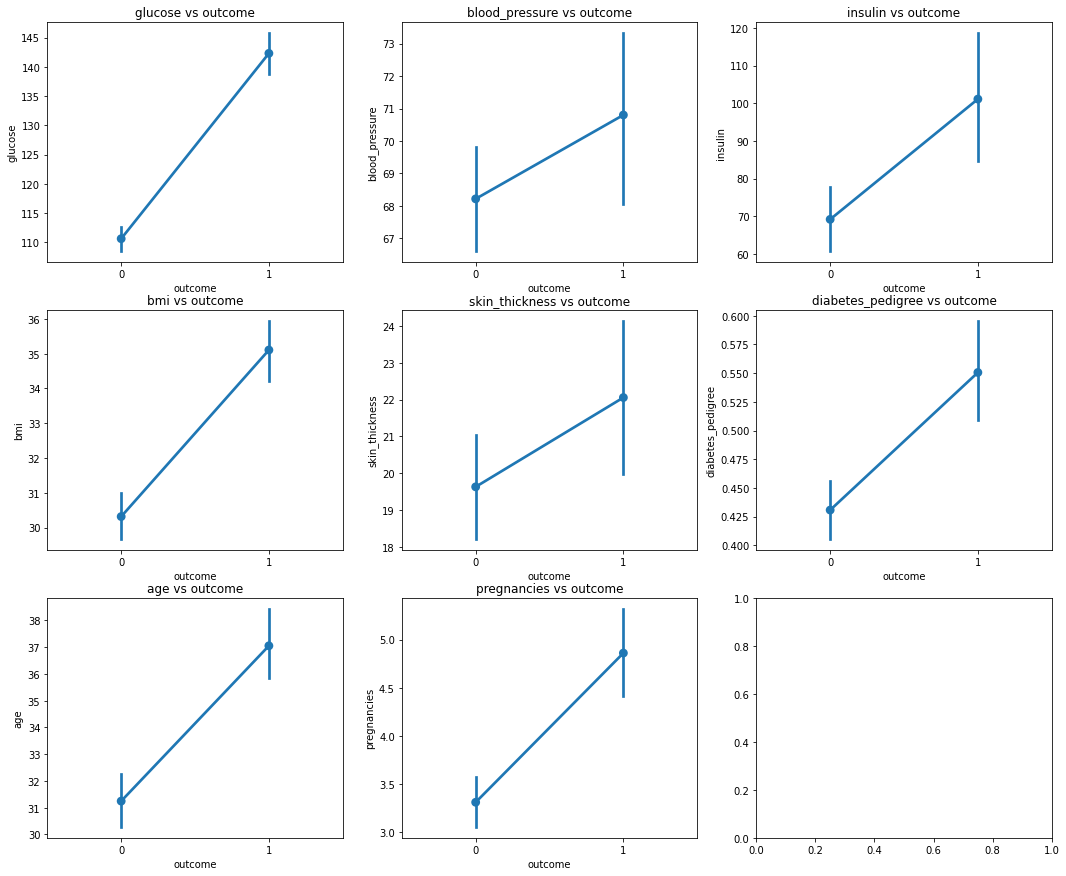

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(18,15))

sns.pointplot(x='outcome', y='glucose', data=df, ax=ax[0,0])
ax[0,0].set_title('glucose vs outcome')

sns.pointplot(x='outcome', y='blood_pressure', data=df, ax=ax[0,1])
ax[0,1].set_title('blood_pressure vs outcome')

sns.pointplot(x='outcome', y='insulin', data=df, ax=ax[0,2])
ax[0,2].set_title('insulin vs outcome')

sns.pointplot(x='outcome', y='bmi', data=df, ax=ax[1,0])
ax[1,0].set_title('bmi vs outcome')

sns.pointplot(x='outcome', y='skin_thickness', data=df, ax=ax[1,1])
ax[1,1].set_title('skin_thickness vs outcome')

sns.pointplot(x='outcome', y='diabetes_pedigree', data=df, ax=ax[1,2])
ax[1,2].set_title('diabetes_pedigree vs outcome')

sns.pointplot(x='outcome', y='age', data=df, ax=ax[2,0])
ax[2,0].set_title('age vs outcome')

sns.pointplot(x='outcome', y='pregnancies', data=df, ax=ax[2,1])
ax[2,1].set_title('pregnancies vs outcome')

plt.show()

```
# Other ideas, not so helpful in this analysis

sns.countplot(x='pointplot', data=df)
plt.show()

sns.countplot(x='pregnancies', data=df)
plt.show()

sns.violinplot(x='pregnancies', y='outcome', data=df)
plt.show()
```
-  estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth.

- `'insulin'`: 2-Hour serum insulin (mu U/ml)
  > Normal Response: A person is said to have a normal response when the 2-hour glucose level is less than or equal to 110 mg/dL. 

  > Diabetes: A person has diabetes when oral glucose tolerance tests show that the blood glucose level at 2 hours is equal to or more than 200 mg/dL. This must be confirmed by a second test (either one) on another day. There has recently been discussion about lowering the upper value to 180 mg/dL to diagnose more people with mild diabetes to allow earlier intervention and hopefully prevention of diabetic complications.

  > Gestational Diabetes: A woman has gestational diabetes when she is pregnant and has any 2 of the following: a fasting plasma glucose of more than 105 mg/dL, a 1-hour glucose level of more than 190 mg/dL, a 2-hour glucose level of more than 165 mg/dL, or a 3-hour glucose level of more than 145 mg/dL.

- Does not initially look like helpful predictor of diabetes, both `0 and 1` have very high insulin results, however `1` does have higher values in the 3rd quartile

- ?: Does `'insulin' == 0` make sense? No, eliminate.

  - University of Washington researcher Stephen Guyenet writes that “The average insulin level in the US is 8.8 mIU/ml for men and 8.4 for women. Given the degree of metabolic dysfunction in this country, I think it’s safe to say that the ideal level of fasting insulin is probably below 8.4 uIU/mL…[Best] would be 2–6.” `https://www.diabetesselfmanagement.com/blog/do-you-know-your-insulin-level/`

## Missing Values

```
youtube_df["Video Uploads"].fillna(youtube_df["Video Uploads"].mean(), inplace=True)
youtube_df["Subscribers"].fillna(youtube_df["Subscribers"].mean(), inplace=True)

# Be careful with `inplace=True`. It works in this case, but sometimes, it's safer to use this:
# youtube_df["Video Uploads"] = youtube_df["Video Uploads"].fillna(youtube_df["Video Uploads"].mean())
# youtube_df["Subscribers"] = youtube_df["Subscribers"].fillna(youtube_df["Subscribers"].mean())
# (See the assessment's example solution for more detail on this issue.)
```

```
columns = educ2_df.columns[2:]
states = educ2_df["STATE"].unique()

for state in states:
    educ2_df.loc[educ2_df["STATE"] == state, columns] = educ2_df.loc[educ2_df["STATE"] == state, columns].interpolate()

# we drop the null values after interpolation
educ2_df.dropna(inplace=True)

# drop missing values in AVG_MATH_8_SCORE
educ3_df = educ_df.copy()
educ3_df.dropna(subset=['AVG_MATH_8_SCORE'])
```

```
# Plot bunch of histograms

plt.figure(figsize=(20,30))
for i in range(len(columns)-1):
    plt.subplot(8, 3, i+1)
    plt.hist(educ2_df[columns[i+1]], bins=20)
    plt.title("Histogram of " + columns[i+1])
```

```
# Easy way to create mulitple plots 

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot()
plt.title()

plt.subplot(1, 2, 2)
plt.plot()
plt.title()

plt.show()
```


- should remove `'insulin' == 0`
- should remove `'blood_pressure' == 0 `
- should remove `'bmi' == 0 `
- should remove `'skin_thickness' == 0 ` ** **
- check how many you are removing
  - (5% 10% kinda ok) 
  - />20%... think about it

```
# Entries where price == 0 
zeros = df[df['price'] == 0]    
# Check to see how many entires were removed
nzero = zeros['price'].count()
print("{} entries will be removed, where price is zero".format(nzero))
```

```
round(educ_df.isnull().sum()/educ_df.isnull().count(),3)
```

In [ ]:
temp = (df['insulin'] == 0) 
temp.sum()
temp.sum() / temp.count()

0.4849279161205767

In [ ]:
df['outcome'].count()

763

In [ ]:
zerocol = ['insulin', 'skin_thickness', 'bmi', 'blood_pressure']

for col in zerocol:
  zeros = (df[col] == 0) 
  print(col)
  print("The percentage of entries equal to zero")
  print(100*round(zeros.sum() / zeros.count(),2))
  

insulin
The percentage of entries equal to zero
48.0
skin_thickness
The percentage of entries equal to zero
30.0
bmi
The percentage of entries equal to zero
1.0
blood_pressure
The percentage of entries equal to zero
5.0


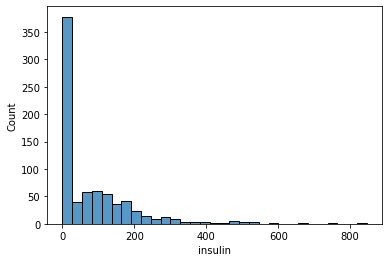

In [ ]:
sns.histplot(data=df, x='insulin')

Definitions:
- Incomplete: One or more of the predictors for the observation has a missing value
- Inaccurate: One or more of the predictors for the observation has a 0 value that is clearly unreasonable

```
# Remove prices == 0 and prices > tol
# Create new df to remove entries where price == 0 and outliers where price > tol 
df_clean = df[(df['price'] !=0) & (df['price'] <= tol)]
```

In [ ]:
 df_clean = df[(df['insulin'] !=0) & (df['bmi'] != 0) & (df['blood_pressure'] != 0) & (df['skin_thickness'] != 0) ]

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1 to 761
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        392 non-null    int64  
 1   glucose            392 non-null    int64  
 2   blood_pressure     392 non-null    int64  
 3   skin_thickness     392 non-null    int64  
 4   insulin            392 non-null    int64  
 5   bmi                392 non-null    float64
 6   diabetes_pedigree  392 non-null    float64
 7   age                392 non-null    int64  
 8   outcome            392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


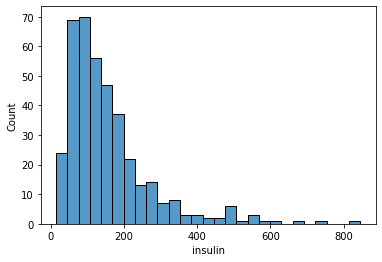

In [ ]:
sns.histplot(data=df_clean, x='insulin')

```
# Heat map code

# Make the correlation matrices
corrmat_youtube = youtube_df.corr()

corrmat_student = student_df.corr()

# Heat maps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# Draw the heat map using seaborn
sns.heatmap(corrmat_youtube, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Youtube)")

plt.subplot(1,2,2)
# Draw the heat map using seaborn
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (student performance)")

plt.show()

# Try to match the correlation numbers 
# to the scatter plots above to get a 
# sense of what each magnitude of 
# correlation can look like.

```

In [ ]:
corrmat= df_clean.corr()

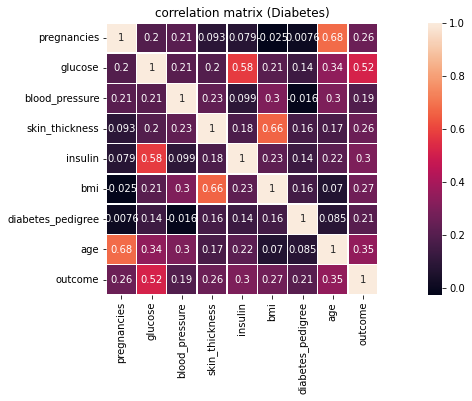

In [ ]:
plt.figure(figsize=(18,5))

# Draw the heat map using seaborn
sns.heatmap(corrmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Diabetes)")

plt.show()


## Outliers

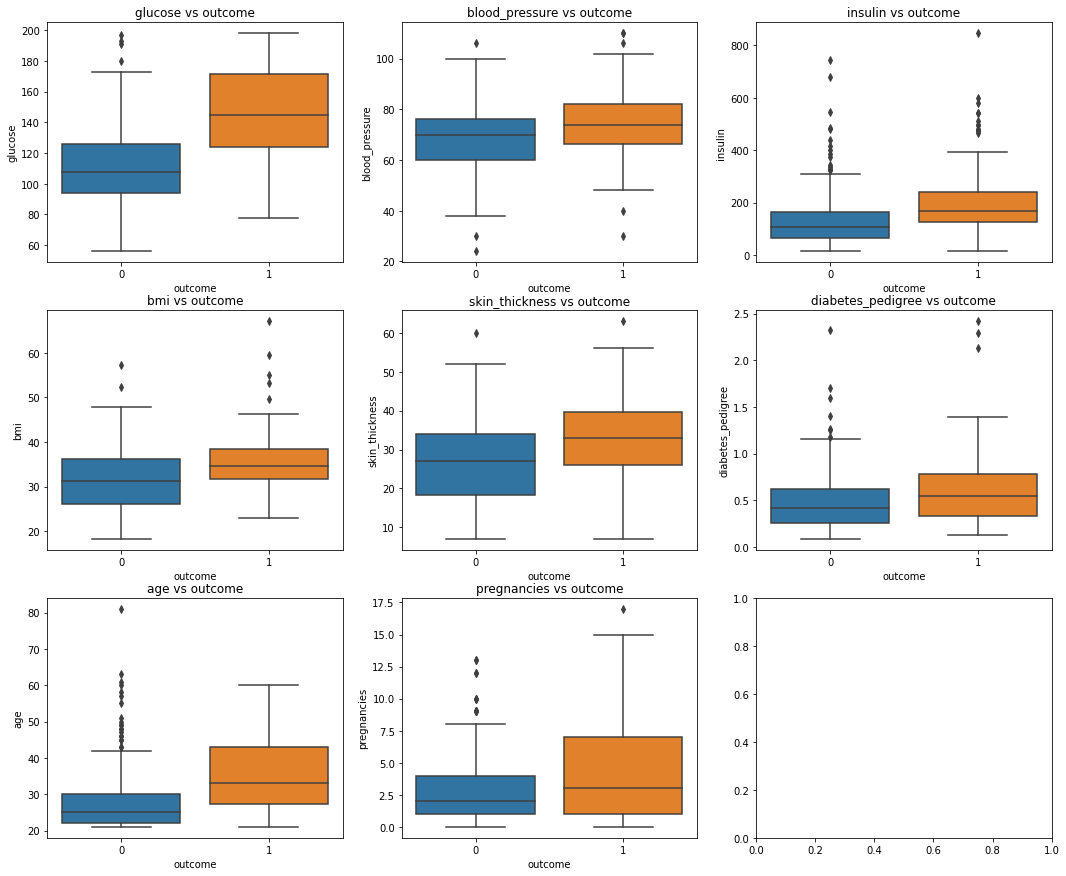

In [ ]:
#Boxplots with missing values removed

fig, ax = plt.subplots(3, 3, figsize=(18,15))

sns.boxplot(x='outcome', y='glucose', data=df_clean, ax=ax[0,0])
ax[0,0].set_title('glucose vs outcome')

sns.boxplot(x='outcome', y='blood_pressure', data=df_clean, ax=ax[0,1])
ax[0,1].set_title('blood_pressure vs outcome')

sns.boxplot(x='outcome', y='insulin', data=df_clean, ax=ax[0,2])
ax[0,2].set_title('insulin vs outcome')

sns.boxplot(x='outcome', y='bmi', data=df_clean, ax=ax[1,0])
ax[1,0].set_title('bmi vs outcome')

sns.boxplot(x='outcome', y='skin_thickness', data=df_clean, ax=ax[1,1])
ax[1,1].set_title('skin_thickness vs outcome')

sns.boxplot(x='outcome', y='diabetes_pedigree', data=df_clean, ax=ax[1,2])
ax[1,2].set_title('diabetes_pedigree vs outcome')

sns.boxplot(x='outcome', y='age', data=df_clean, ax=ax[2,0])
ax[2,0].set_title('age vs outcome')

sns.boxplot(x='outcome', y='pregnancies', data=df_clean, ax=ax[2,1])
ax[2,1].set_title('pregnancies vs outcome')

plt.show()

- For now, skipping outliers
- move onto PCA

```
fifa_df = fifa_df.dropna()
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(fifa_df)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns. So transpose `X`.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)
```

```
# Calculating eigenvalues and eigenvectors
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The proportion of total variance in the dataset explained by each',
    'component calculated by hand\n',
    eig_val_cov / sum(eig_val_cov)
)
```

```
#Manual
#PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = education_df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
                  "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
education_df["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
```

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree', 'age'],
      dtype='object')

In [ ]:
X = df_clean[['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree', 'age']]


In [ ]:
df_clean.corr()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome,pca_1
pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566,0.503297
glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703,0.678867
blood_pressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673,0.527274
skin_thickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936,0.612500
insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429,0.583763
bmi,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118,0.588348
diabetes_pedigree,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330,0.267768
age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804,0.658442
outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000,0.531153
pca_1,0.503297,0.678867,0.527274,0.612500,0.583763,0.588348,0.267768,0.658442,0.531153,1.000000


In [ ]:
#Normalize the data so that all variables have a mean of 0 and standard deviation of 1.
X = StandardScaler().fit_transform(X) 

In [ ]:
# The NumPy covariance function assumes that variables are represented by rows,
# not columns. So transpose `X`.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00255754  0.19879818  0.21390044  0.09344778  0.07918563 -0.0254121
   0.00758146  0.6813466 ]
 [ 0.19879818  1.00255754  0.21056373  0.1993644   0.58270952  0.21005177
   0.1405387   0.34452038]
 [ 0.21390044  0.21056373  1.00255754  0.233166    0.09876345  0.30518189
  -0.01601195  0.30080631]
 [ 0.09344778  0.1993644   0.233166    1.00255754  0.18266504  0.66605398
   0.16090901  0.1681902 ]
 [ 0.07918563  0.58270952  0.09876345  0.18266504  1.00255754  0.22697554
   0.13625337  0.21763719]
 [-0.0254121   0.21005177  0.30518189  0.66605398  0.22697554  1.00255754
   0.15917711  0.06999235]
 [ 0.00758146  0.1405387  -0.01601195  0.16090901  0.13625337  0.15917711
   1.00255754  0.08524657]
 [ 0.6813466   0.34452038  0.30080631  0.1681902   0.21763719  0.06999235
   0.08524657  1.00255754]]


In [ ]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The proportion of total variance in the dataset explained by each',
    'component calculated by hand\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[-0.31459005 -0.42433171 -0.32957685 -0.38284835 -0.3648862  -0.3677518
 -0.16737061 -0.41156493]
Eigenvalue 1: 2.566068583375975
----------------------------------------
Eigenvector 2: 
[-0.5519162  -0.04691165 -0.0310265   0.41288424  0.06771988  0.50463924
  0.1882636  -0.47651005]
Eigenvalue 2: 1.560762043339242
----------------------------------------
Eigenvector 3: 
[ 0.21849279 -0.47389479  0.39071857  0.30243304 -0.58184163  0.25640534
 -0.25560994  0.1180596 ]
Eigenvalue 3: 1.2018294155079456
----------------------------------------
Eigenvector 4: 
[ 0.196718   -0.22732104 -0.30670295  0.08988925 -0.25475531 -0.03239358
  0.84679316  0.1564357 ]
Eigenvalue 4: 0.9581392975506408
----------------------------------------
Eigenvector 5: 
[-0.24532769  0.06218971  0.77641617 -0.38113858 -0.0743071  -0.141116
  0.38784281 -0.10954803]
Eigenvalue 5: 0.7220158710386331
----------------------------------------
Eigenvector 6: 
[ 0.0963409  -0.72284917  0.09849225 -0.1216

First and second component explain most variance

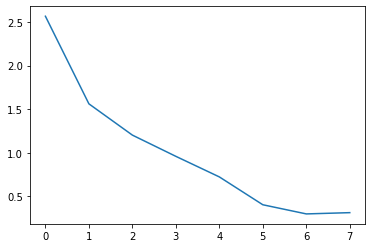

[2.56606858 1.56076204 1.20182942 0.9581393  0.72201587 0.40244783
 0.29732798 0.31186933]


In [ ]:
# Print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

- 5 or 6 components, based on change in slope
- or maybe 3 using rule eigenvalue > 1

In [ ]:
n_components = 3

In [ ]:
sklearn_pca = PCA(n_components)
df_clean["pca_1"] = sklearn_pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.31994031 0.19459756 0.14984544]


In [ ]:
df_clean.corr().iloc[-2:,-2:]

,outcome,pca_1
outcome,1.000000,0.531153
pca_1,0.531153,1.000000


First principle component is more correlated with outcome than any other feature. 

In [ ]:
totalvar = [0.31994031, 0.19459756, 0.14984544]

In [ ]:
np.sum(totalvar)

0.6643833100000001